In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
customer = pd.read_csv(r"C:\Users\reddy\Desktop\Mall_Customers.csv")
customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer.shape

(200, 5)

In [ ]:
customer.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
sns.set(style="whitegrid")

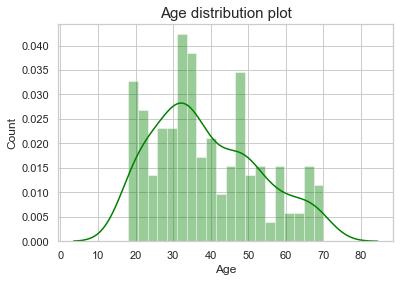

In [ ]:
sns.distplot(customer['Age'],color= 'green',bins=20)
plt.title('Age distribution plot', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

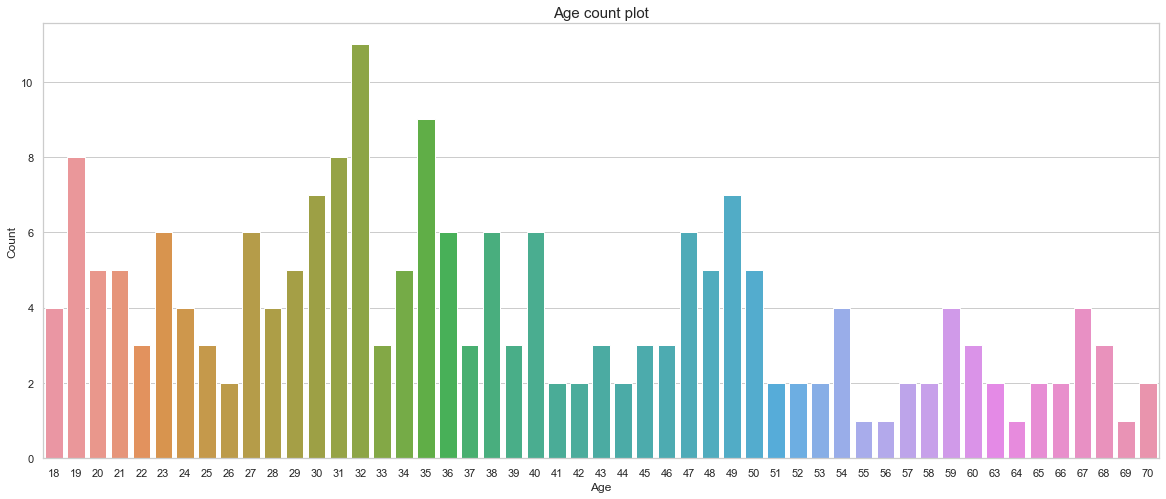

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(customer['Age'])
plt.title('Age count plot', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

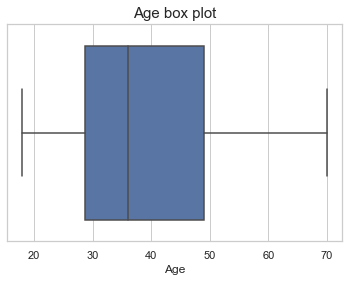

In [ ]:
sns.boxplot(customer['Age'])
plt.title('Age box plot', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.show()

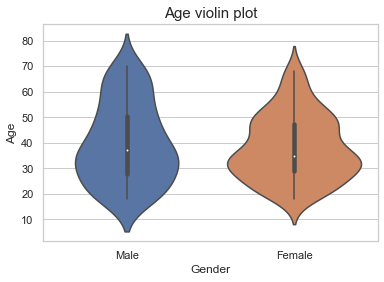

In [ ]:
sns.violinplot(y = 'Age' , x = 'Gender' , data = customer)
plt.title('Age violin plot', fontsize = 15)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Age', fontsize = 12)
plt.show()

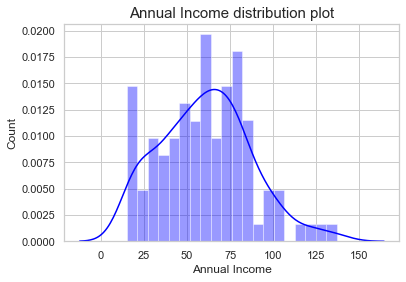

In [ ]:
sns.distplot(customer['Annual Income (k$)'],color= 'blue',bins=20)
plt.title('Annual Income distribution plot', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

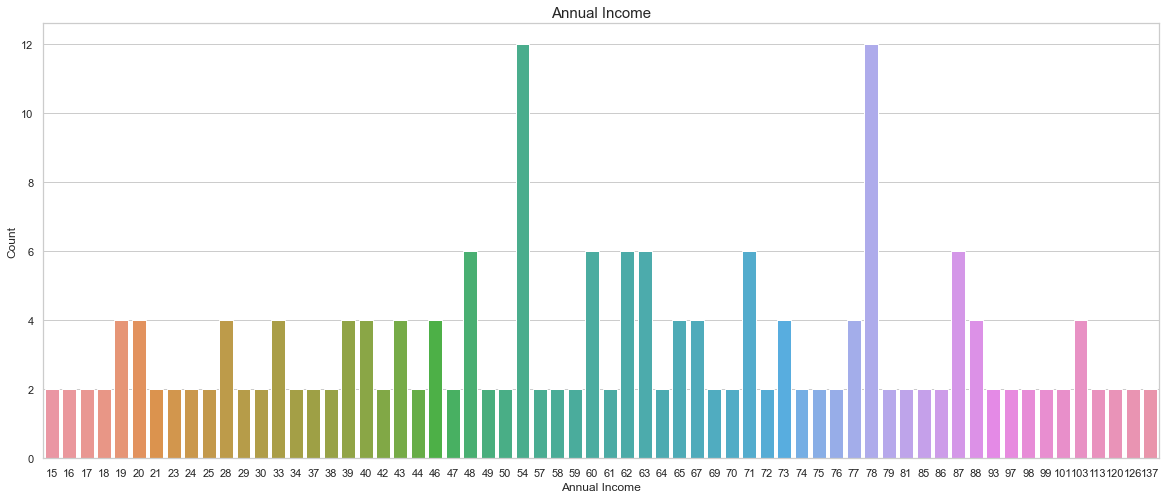

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(customer['Annual Income (k$)'])
plt.title('Annual Income', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()


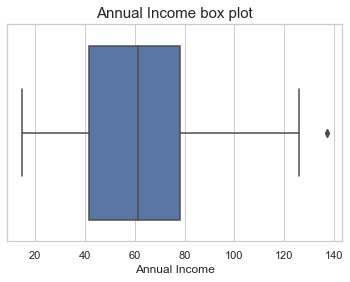

In [ ]:
sns.boxplot(customer['Annual Income (k$)'])
plt.title('Annual Income box plot', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 12)
plt.show()

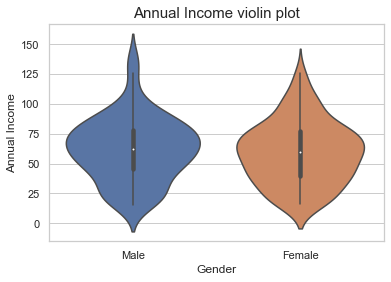

In [ ]:
sns.violinplot(y = 'Annual Income (k$)' , x = 'Gender' , data = customer)
plt.title('Annual Income violin plot', fontsize = 15)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Annual Income', fontsize = 12)
plt.show()

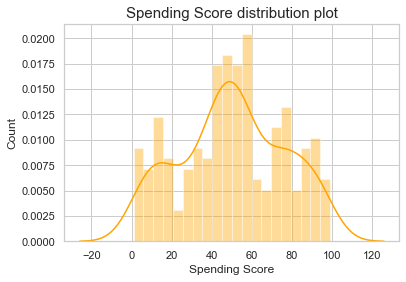

In [ ]:
sns.distplot(customer['Spending Score (1-100)'],color= 'orange',bins=20)
plt.title('Spending Score distribution plot', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

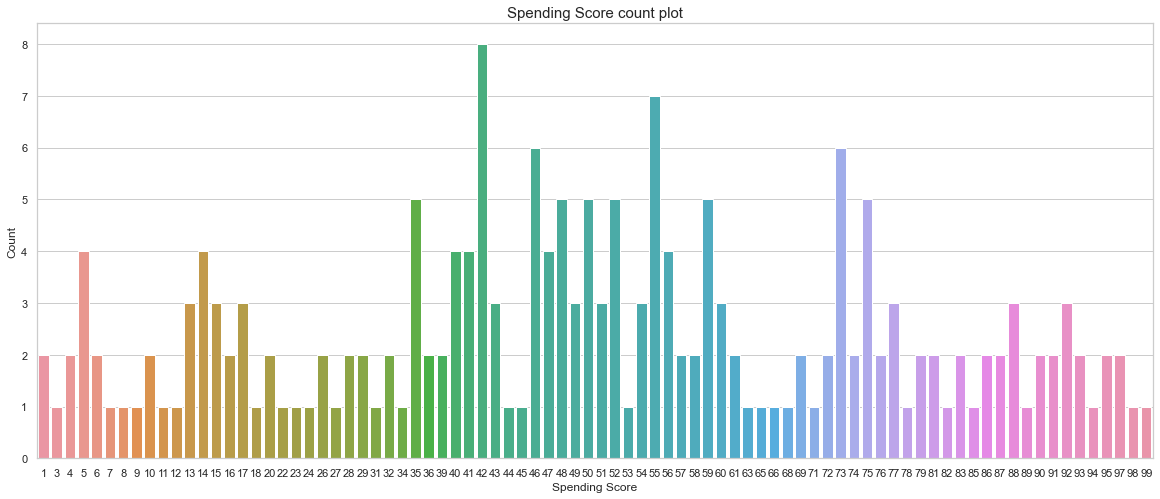

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(customer['Spending Score (1-100)'])
plt.title('Spending Score count plot', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

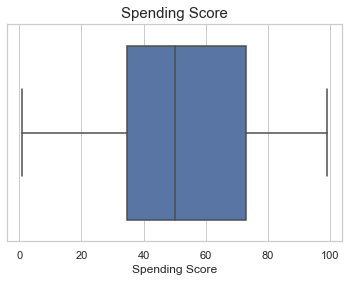

In [ ]:
sns.boxplot(customer['Spending Score (1-100)'])
plt.title('Spending Score', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 12)
plt.show()

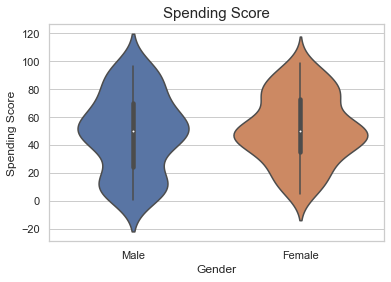

In [ ]:
sns.violinplot(y = 'Spending Score (1-100)' , x = 'Gender' , data = customer)
plt.title('Spending Score', fontsize = 15)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.show()

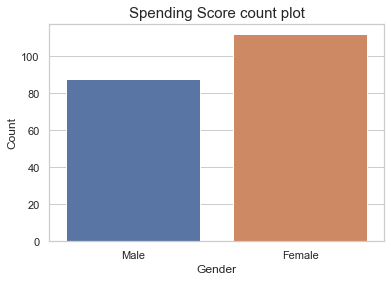

In [ ]:
sns.countplot(x='Gender', data=customer)
plt.title('Spending Score count plot', fontsize = 15)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

<AxesSubplot:>

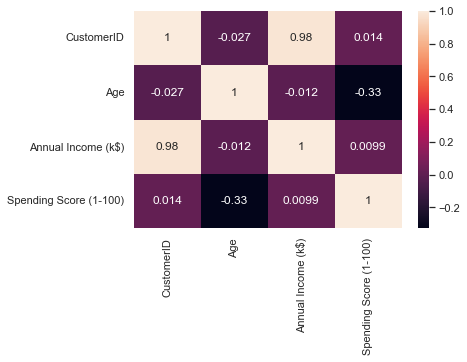

In [ ]:
sns.heatmap(customer.corr(), annot = True)

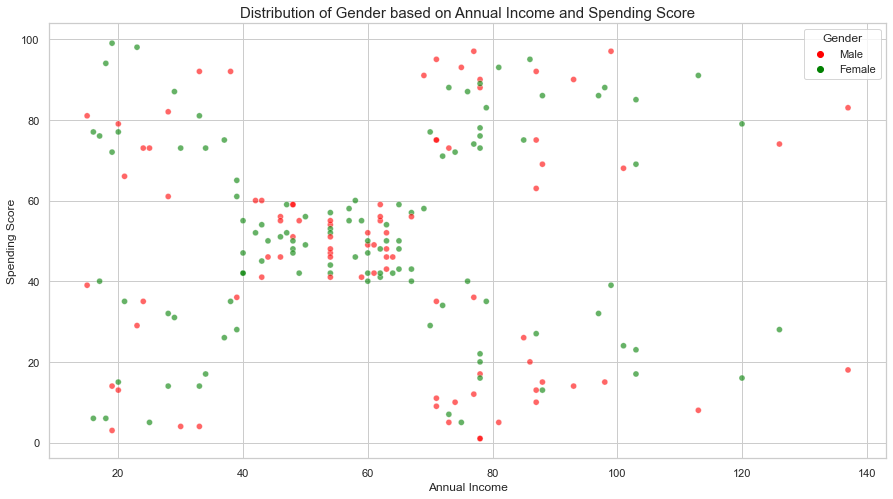

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(customer['Annual Income (k$)'], customer['Spending Score (1-100)'],hue=customer['Gender'],
                palette= ['red','green'] ,alpha=0.6)
plt.title('Distribution of Gender based on Annual Income and Spending Score', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


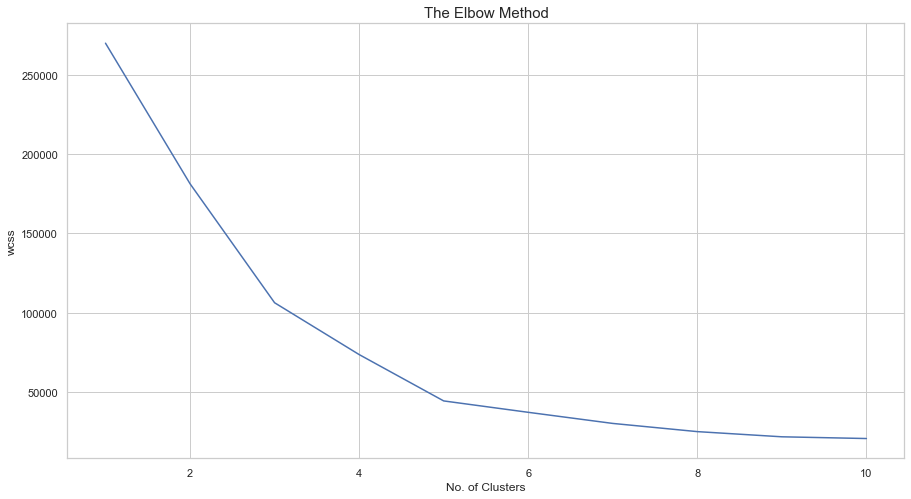

In [ ]:
Income_Spend = customer[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(Income_Spend)
    wcss.append(km.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 15)
plt.xlabel('No. of Clusters', fontsize = 12)
plt.ylabel('wcss', fontsize = 12)
plt.show()   

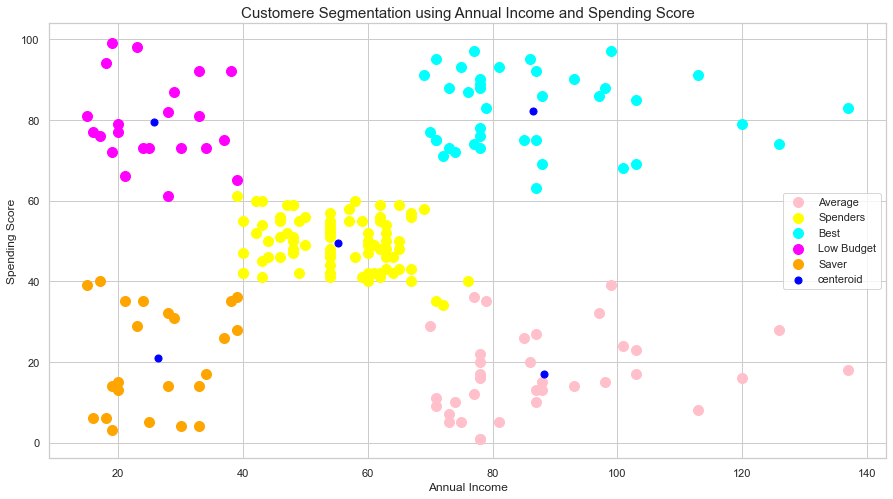

In [ ]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(Income_Spend)

plt.figure(figsize=(15,8))
plt.scatter(Income_Spend[y_means == 0, 0], Income_Spend[y_means == 0, 1], s = 100, c = 'pink', label = 'Average')
plt.scatter(Income_Spend[y_means == 1, 0], Income_Spend[y_means == 1, 1], s = 100, c = 'yellow', label = 'Spenders')
plt.scatter(Income_Spend[y_means == 2, 0], Income_Spend[y_means == 2, 1], s = 100, c = 'cyan', label = 'Best')
plt.scatter(Income_Spend[y_means == 3, 0], Income_Spend[y_means == 3, 1], s = 100, c = 'magenta', label = 'Low Budget')
plt.scatter(Income_Spend[y_means == 4, 0], Income_Spend[y_means == 4, 1], s = 100, c = 'orange', label = 'Saver')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.legend()
plt.title('Customere Segmentation using Annual Income and Spending Score', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.show()

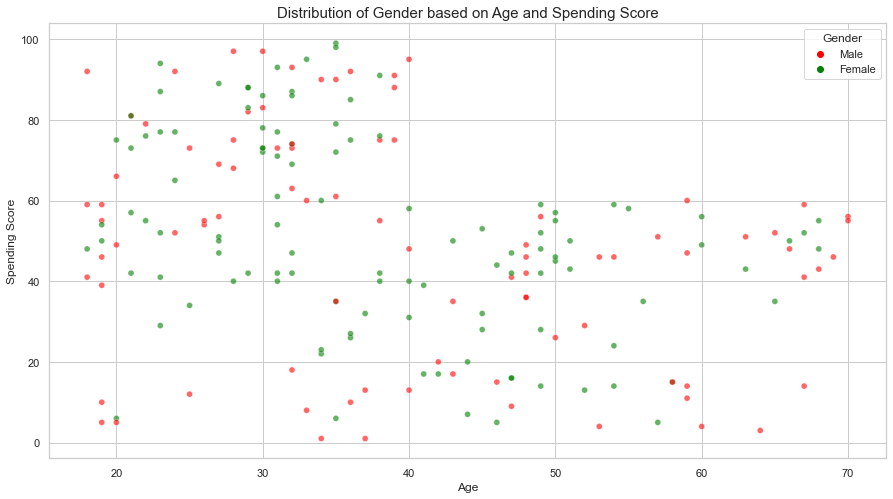

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(customer['Age'], customer['Spending Score (1-100)'],hue=customer['Gender'],palette= ['red','green'] ,alpha=0.6)
plt.title('Distribution of Gender based on Age and Spending Score', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


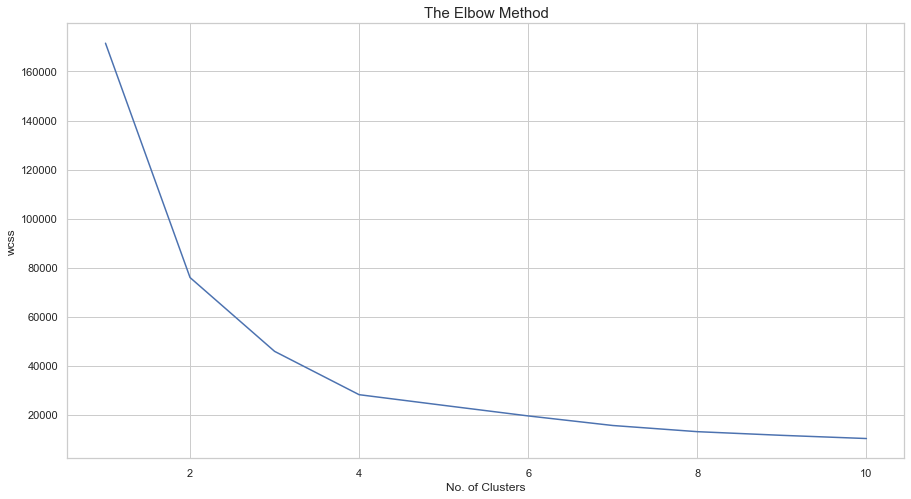

In [ ]:
Age_Spend = customer[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(Age_Spend)
    wcss.append(km.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 15)
plt.xlabel('No. of Clusters', fontsize = 12)
plt.ylabel('wcss', fontsize = 12)
plt.show()  

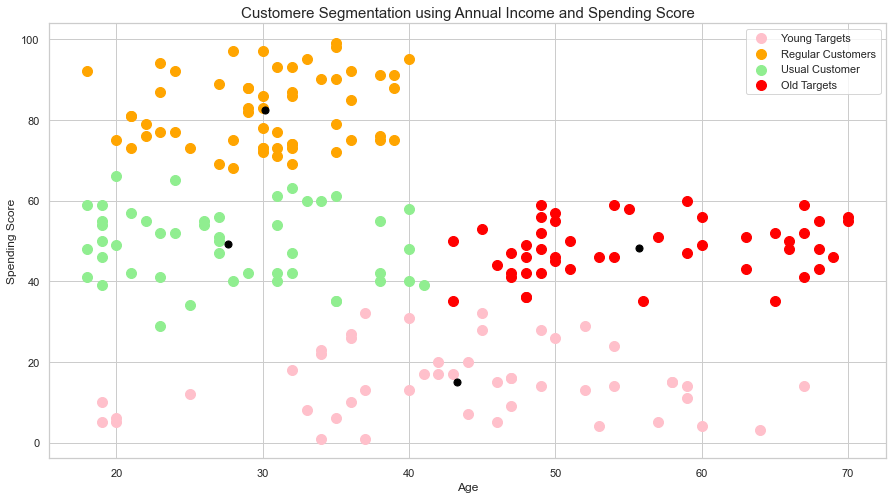

In [ ]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = km.fit_predict(Age_Spend)

plt.figure(figsize=(15,8))
plt.scatter(Age_Spend[ymeans == 0, 0], Age_Spend[ymeans == 0, 1], s = 100, c = 'pink', label = 'Young Targets' )
plt.scatter(Age_Spend[ymeans == 1, 0], Age_Spend[ymeans == 1, 1], s = 100, c = 'orange', label = 'Regular Customers')
plt.scatter(Age_Spend[ymeans == 2, 0], Age_Spend[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Usual Customer')
plt.scatter(Age_Spend[ymeans == 3, 0], Age_Spend[ymeans == 3, 1], s = 100, c = 'red', label = 'Old Targets')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'black')
plt.legend()
plt.title('Customere Segmentation using Annual Income and Spending Score', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.show()